In [1]:
import pandas as pd

In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [3]:
from nsepy import get_history as gh
import datetime as dt

In [4]:
"""start = dt.datetime(2021,9,1)
end = dt.datetime(2022,2,4)
stk_data = gh(symbol='TATACOFFEE',start=start,end=end)"""


"start = dt.datetime(2021,9,1)\nend = dt.datetime(2022,2,4)\nstk_data = gh(symbol='TATACOFFEE',start=start,end=end)"

In [5]:
dataset=pd.read_csv("Tatacoffee13_21.csv", parse_dates=['Date'], index_col='Date')

#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2019-02-04") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

stk_data=dataset
stk_data.index=all_date

stk_data

,Open,High,Low,Close
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-05,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2019-01-30,202.90,207.80,201.35,205.00
2019-01-31,206.00,206.85,202.05,202.95
2019-02-01,203.90,203.90,199.35,201.00
2019-02-02,200.00,222.00,196.00,218.35


In [6]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [7]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (2225, 1)


In [8]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [9]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

C:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.019965521884647033
maPe-Testset: 3594911186.7485414


C:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.019966131106525144
maPe-Testset: 3599256534.347902


C:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.01996591424055294
maPe-Testset: 3566218263.1502967
RMSE-Testset: 0.019966131106525144
maPe-Testset: 3599256534.347902


C:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


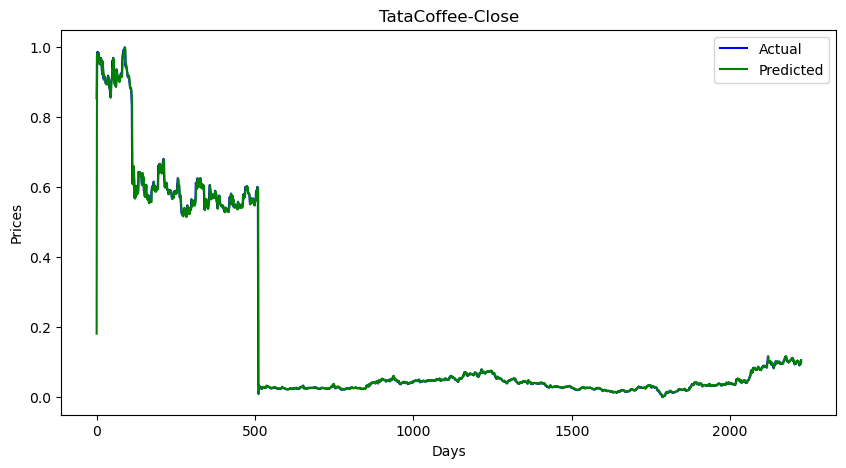

In [10]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [11]:
len(data1)

2225

In [12]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [13]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

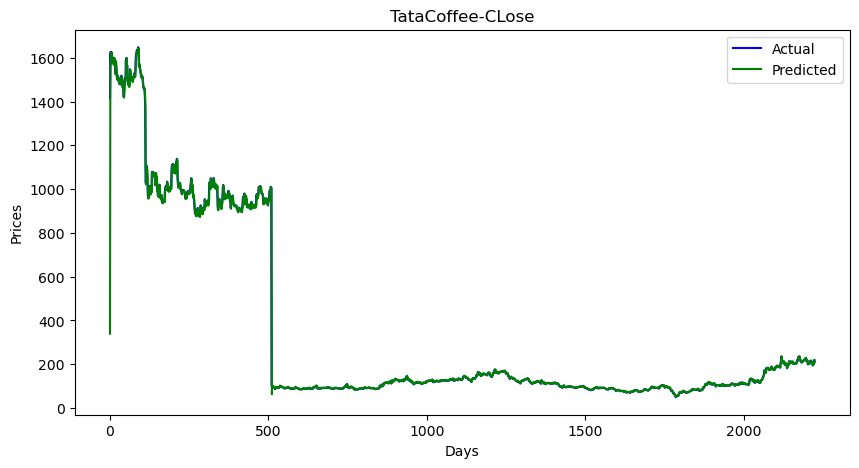

In [14]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [15]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 31.9218504131124
maPe-Testset: 0.020860807199032428


C:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [17]:
forecast

array([0.10199764, 0.10227282, 0.10254704, 0.10282032])

In [18]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [19]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [20]:
forecast_stock_price_test_oriF

,Closefore
0,212.473832
1,212.913781
2,213.35221
3,213.789122
